# 1/ Loading and formatting the Datasets

In this section we load and format the different csv files representing the Dataset:

- Engine degradation simulation was carried out using C-MAPSS. 
- Four different were sets simulated under different combinations of operational conditions and fault modes. 
- Records several sensor channels to characterize fault evolution.

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

## 1.2/ The Remaining Useful Life csv files

The goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

In [40]:
FD001=pd.read_csv('Kaggle_Data/RUL_FD001.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
FD002=pd.read_csv('Kaggle_Data/RUL_FD002.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
FD003=pd.read_csv('Kaggle_Data/RUL_FD003.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
FD004=pd.read_csv('Kaggle_Data/RUL_FD004.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
FD001.columns=['Final_RUL']
FD002.columns=['Final_RUL']
FD003.columns=['Final_RUL']
FD004.columns=['Final_RUL']


# FD001.info()

## 1.3/ The Test and Train csv files

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. 

Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. 

Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. 

There are **three operational settings** that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

### 1.3.1/ The trainset csv files

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure.

In [41]:
train_1=pd.read_csv('Kaggle_Data/train_FD001.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
train_2=pd.read_csv('Kaggle_Data/train_FD002.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
train_3=pd.read_csv('Kaggle_Data/train_FD003.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
train_4=pd.read_csv('Kaggle_Data/train_FD004.txt',delimiter=" ",header=None).dropna(axis=1, how='all')

# train_1.info()

### 1.3.2/ The testset csv files

In the test set, the time series ends some time prior to system failure. 

The objective of the competition is to predict **the number of remaining operational cycles before failure** in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. 

Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

In [42]:
test_1=pd.read_csv('Kaggle_Data/test_FD001.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
test_2=pd.read_csv('Kaggle_Data/test_FD002.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
test_3=pd.read_csv('Kaggle_Data/test_FD003.txt',delimiter=" ",header=None).dropna(axis=1, how='all')
test_4=pd.read_csv('Kaggle_Data/test_FD004.txt',delimiter=" ",header=None).dropna(axis=1, how='all')

### 1.3.3/ csv files structure

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:
- 1) unit number
- 2) time, in cycles
- 3) operational setting 1
- 4) operational setting 2
- 5) operational setting 3
- 6) sensor measurement 1
- 7) sensor measurement 2

…
- 26) sensor measurement 21

**We add this information in the columns of the *train* and *test* datasets:**

In [43]:
columns = ['unit_id','time_in_cycles','op_setting_1','op_setting_2','TRA','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]

In [44]:
train_1.columns, train_2.columns, train_3.columns, train_4.columns = columns, columns, columns, columns
test_1.columns, test_2.columns, test_3.columns, test_4.columns, = columns, columns, columns, columns

### 1.3.4/ The x file

Column vecteur x.

In [45]:
df_x = pd.read_csv('Kaggle_Data/x.txt',delimiter=" ",header=None).dropna(axis=1, how='all')

df_x.head()

0
0   18
1   79
2  106
3  110
4   15

# 2/ Visualization of the Dataset

In this section we use the previously formated RUL, train and test dataset and perform:
- train dataset visualisation
- test dataset visualisation
- RUL visualization
- x visualization

## 2.1/ Train Dataset visualization

Selection on unit_id number 2.

In [46]:
train_1[train_1['unit_id']==2]

unit_id  time_in_cycles  op_setting_1  op_setting_2    TRA      T2  \
192        2               1       -0.0018        0.0006  100.0  518.67   
193        2               2        0.0043       -0.0003  100.0  518.67   
194        2               3        0.0018        0.0003  100.0  518.67   
195        2               4        0.0035       -0.0004  100.0  518.67   
196        2               5        0.0005        0.0004  100.0  518.67   
..       ...             ...           ...           ...    ...     ...   
474        2             283        0.0046        0.0002  100.0  518.67   
475        2             284       -0.0006        0.0001  100.0  518.67   
476        2             285       -0.0007        0.0004  100.0  518.67   
477        2             286       -0.0010       -0.0003  100.0  518.67   
478        2             287       -0.0005        0.0006  100.0  518.67   

        T24      T30      T50     P2  ...     phi      NRf      NRc     BPR  \
192  641.89  1583.84  1391.28  14.62  ...  522.33  2388.06  8137.72  8.3905   
193  641.82  1587.05  1393.13  14.62  ...  522.70  2387.98  8131.09  8.4167   
194  641.55  1588.32  1398.96  14.62  ...  522.58  2387.99  8140.58  8.3802   
195  641.68  1584.15  1396.08  14.62  ...  522.49  2387.93  8140.44  8.4018   
196  641.73  1579.03  1402.52  14.62  ...  522.27  2387.94  8136.67  8.3867   
..      ...      ...      ...    ...  ...     ...      ...      ...     ...   
474  643.78  1602.03  1429.67  14.62  ...  520.07  2388.20  8174.85  8.5199   
475  643.91  1601.35  1430.04  14.62  ...  519.95  2388.21  8166.83  8.5291   
476  643.67  1596.84  1431.17  14.62  ...  519.91  2388.22  8164.83  8.5242   
477  643.44  1603.63  1429.57  14.62  ...  519.51  2388.22  8169.97  8.4932   
478  643.85  1608.50  1430.84  14.62  ...  519.81  2388.21  8175.57  8.5365   

     farB  htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
192  0.03      391    2388      100.0  38.94  23.4585  
193  0.03      392    2388      100.0  39.06  23.4085  
194  0.03      391    2388      100.0  39.11  23.4250  
195  0.03      391    2388      100.0  39.13  23.5027  
196  0.03      390    2388      100.0  39.18  23.4234  
..    ...      ...     ...        ...    ...      ...  
474  0.03      398    2388      100.0  38.42  23.0358  
475  0.03      395    2388      100.0  38.23  23.1196  
476  0.03      396    2388      100.0  38.39  23.1155  
477  0.03      395    2388      100.0  38.33  23.0169  
478  0.03      398    2388      100.0  38.43  23.0848  

[287 rows x 26 columns]

In [49]:
train_1.loc[:,train_1.apply(pd.Series.nunique) == 1].columns

Index(['TRA', 'T2', 'P2', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'], dtype='object')

Calculation of time_in_cycle mean for train set 3.

In [9]:
train_1_mean=train_3[['unit_id','time_in_cycles']].groupby(["unit_id"]).max().mean()

In [10]:
train_1['TRA']

0        100.0
1        100.0
2        100.0
3        100.0
4        100.0
         ...  
20626    100.0
20627    100.0
20628    100.0
20629    100.0
20630    100.0
Name: TRA, Length: 20631, dtype: float64

In [11]:
train_1_mean

time_in_cycles    247.2
dtype: float64

## 2.1/ Test Dataset visualization

In [12]:
test_3.head()

unit_id  time_in_cycles  op_setting_1  op_setting_2    TRA      T2     T24  \
0        1               1       -0.0017       -0.0004  100.0  518.67  641.94   
1        1               2        0.0006       -0.0002  100.0  518.67  642.02   
2        1               3        0.0014       -0.0003  100.0  518.67  641.68   
3        1               4        0.0027        0.0001  100.0  518.67  642.20   
4        1               5       -0.0001        0.0001  100.0  518.67  642.46   

       T30      T50     P2  ...     phi      NRf      NRc     BPR  farB  \
0  1581.93  1396.93  14.62  ...  521.89  2387.94  8133.48  8.3760  0.03   
1  1584.86  1398.90  14.62  ...  521.85  2388.01  8137.44  8.4062  0.03   
2  1581.78  1391.92  14.62  ...  522.10  2387.94  8138.25  8.3553  0.03   
3  1584.53  1395.34  14.62  ...  522.45  2387.96  8137.07  8.3709  0.03   
4  1589.03  1395.86  14.62  ...  521.91  2387.97  8134.20  8.4146  0.03   

   htBleed  Nf_dmd  PCNfR_dmd    W31      W32  
0      391    2388      100.0  39.07  23.4468  
1      391    2388      100.0  39.04  23.4807  
2      391    2388      100.0  39.10  23.4244  
3      392    2388      100.0  38.97  23.4782  
4      391    2388      100.0  39.09  23.3950  

[5 rows x 26 columns]

In [13]:
test_3['unit_id'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

## 2.2/ Remaining Useful Life Visualization

The plots below are showing the different RUL values of each of the test set.  
We can observe that each one of the dataset is having a different range of values for RUL.

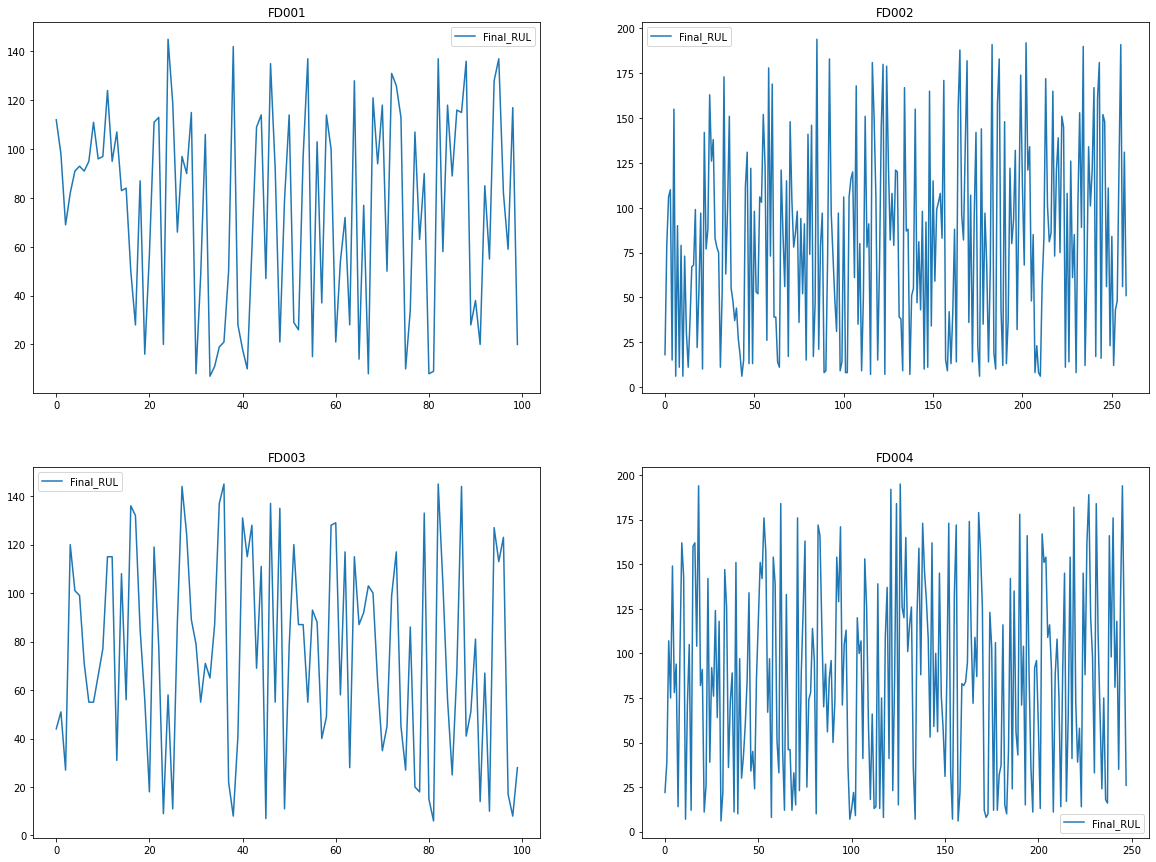

In [14]:
fig, ax = plt.subplots(2,2,figsize=(20,15))
FD001.plot(ax=ax[0,0],title='FD001')
FD002.plot(ax=ax[0,1],title='FD002')
FD003.plot(ax=ax[1,0],title='FD003')
FD004.plot(ax=ax[1,1],title='FD004')
plt.show()

## 2.3/ X file Visualization

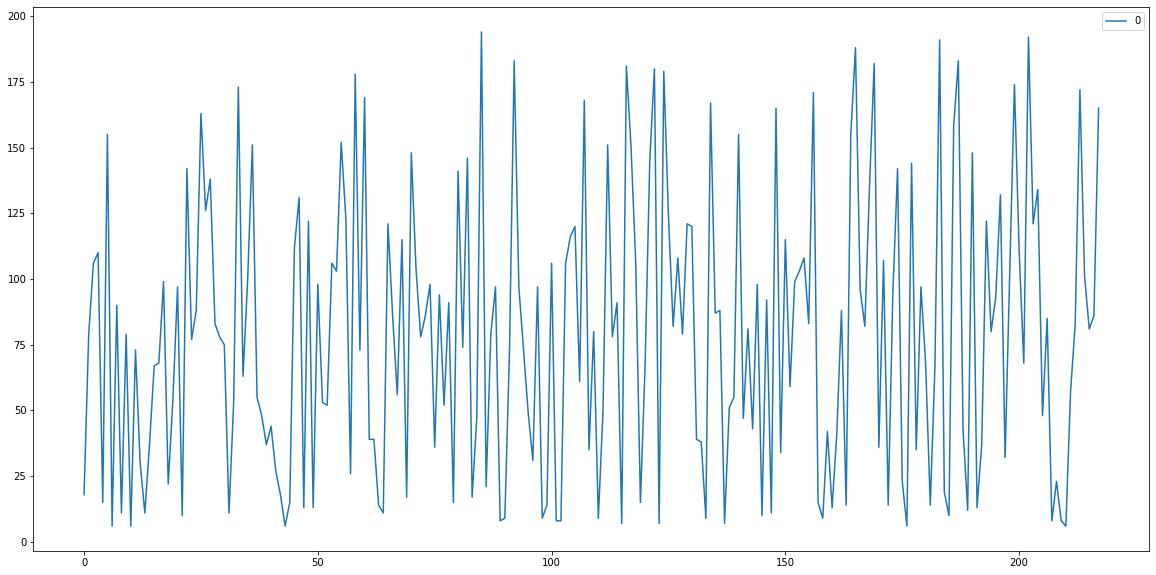

In [15]:
df_x.plot(figsize=(20,10))
plt.show()

## 2.4/ Sensors examples visualization

In this section, we implemented a function random_plot_selection, this is used in order to have some information and visualization of the shape of the sensors.

Using this we can see that are constant over cycles (ex: epr, Nf_dmd, farB) 

In [16]:
def random_plot_selection(df,col_name,n=None,col_list=None,ordered=True):
    '''
        Select n units in the dataframe and plot their colomns for each unit
    '''
    total_units=len(df[col_name].unique())
    
    #select n  units in the total_units
    if col_list==None:
        if ordered:
            col_list=list(range(1,n+1))
        else:
            col_list=random.sample(range(0,total_units), n)

    for col in df.columns:
        sns.relplot(x='time_in_cycles',y=col, kind="line",data=df[df[col_name].isin(col_list)], hue="unit_id")

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


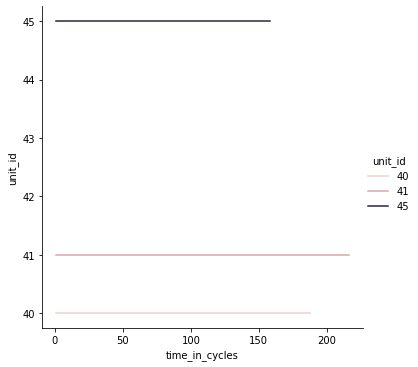

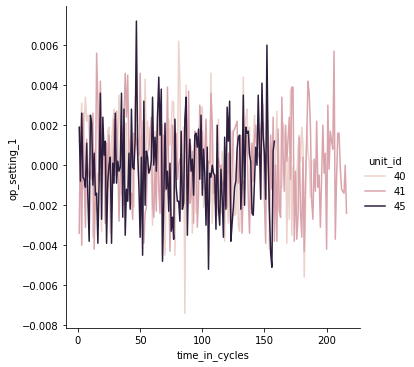

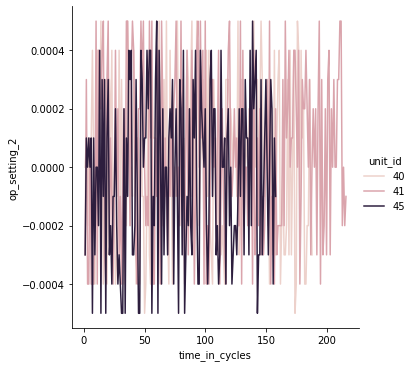

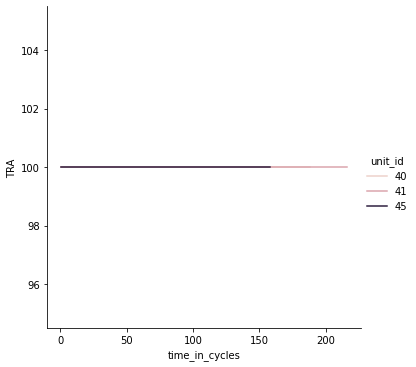

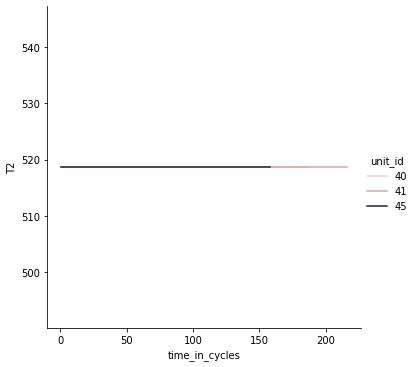

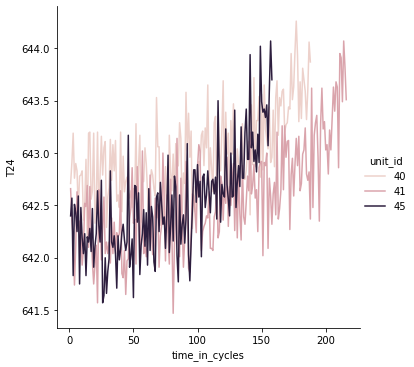

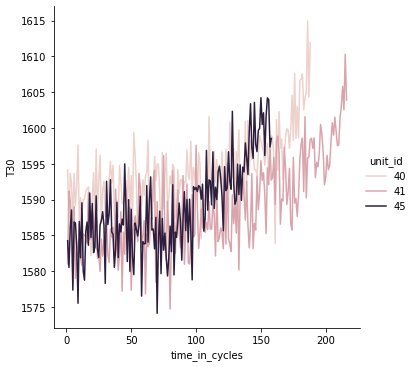

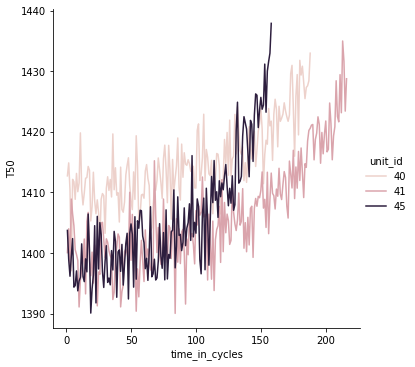

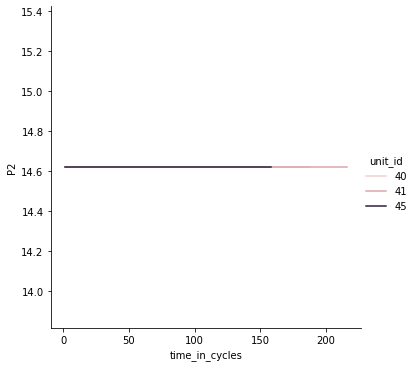

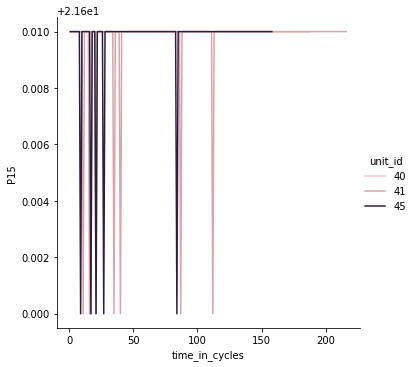

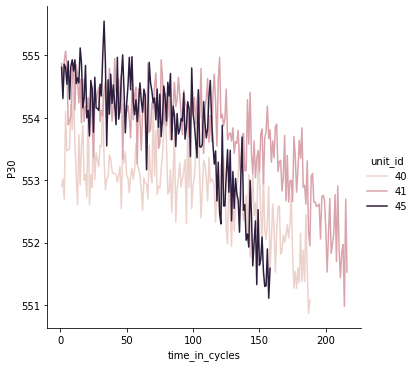

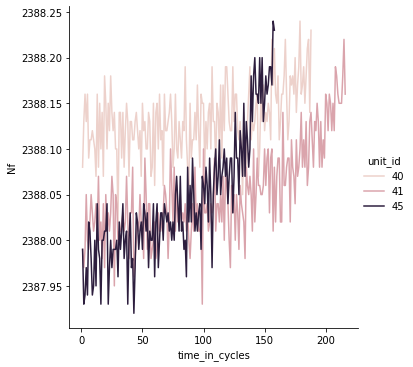

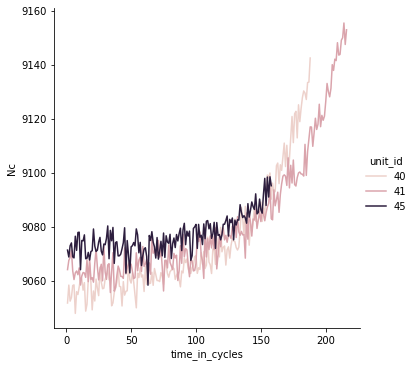

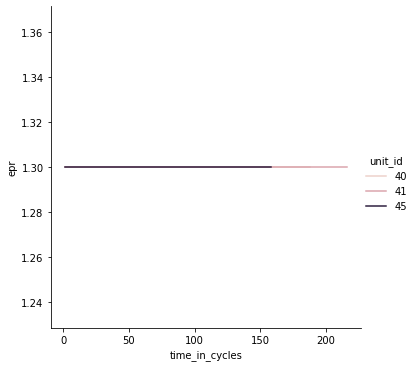

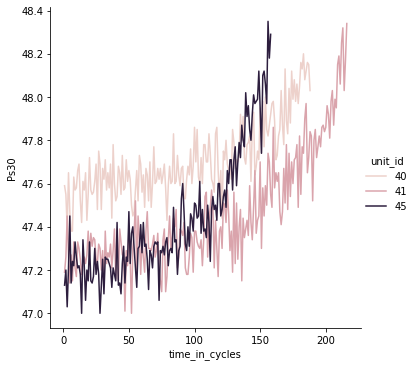

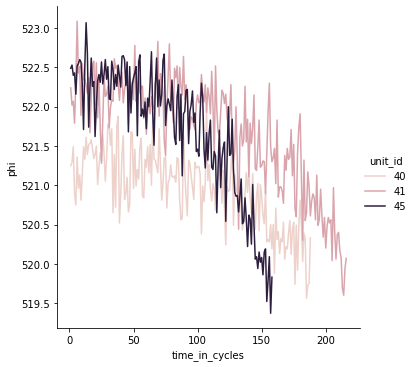

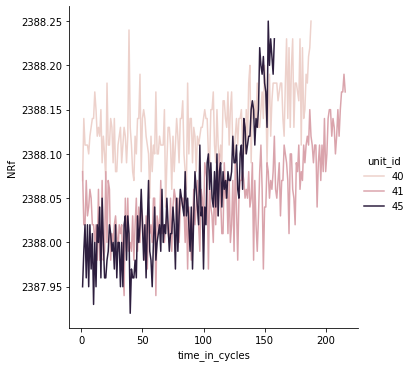

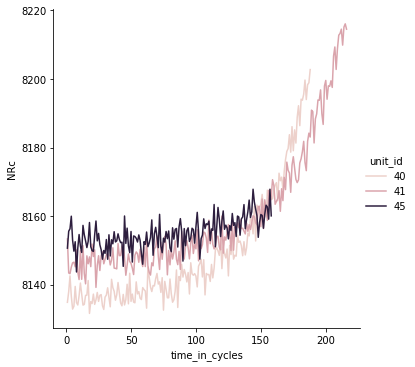

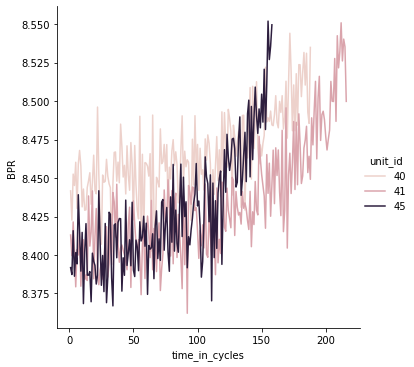

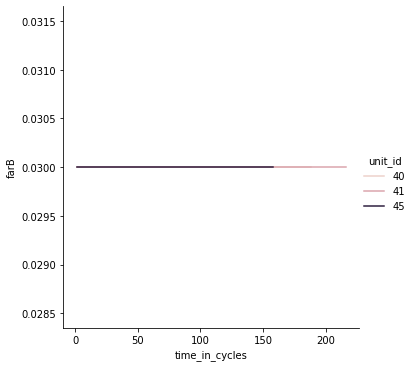

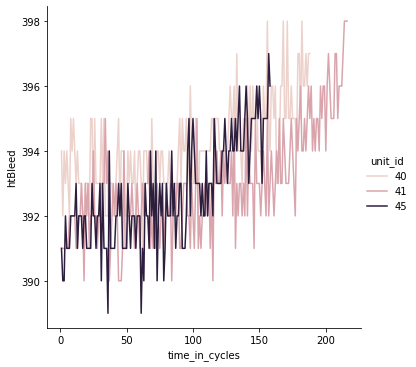

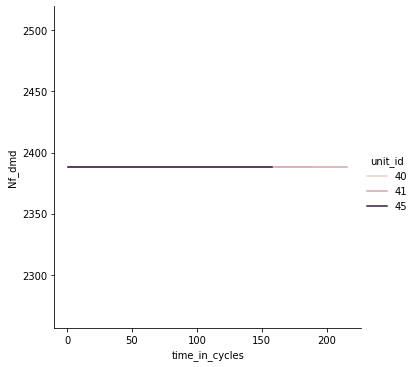

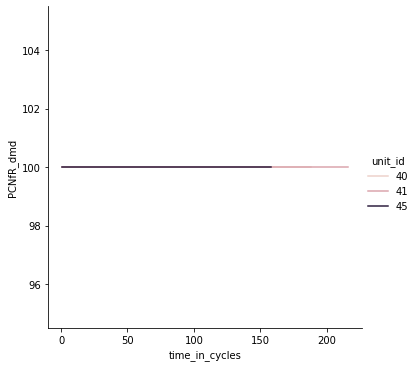

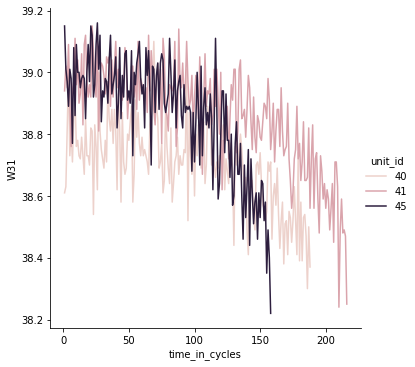

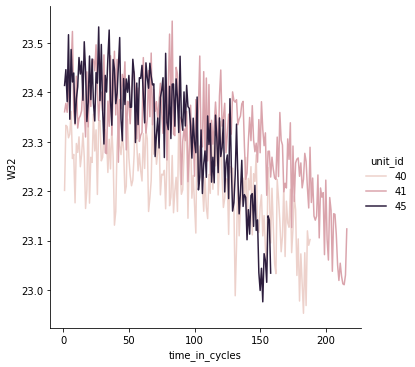

In [17]:
random_plot_selection(train_1,'unit_id',col_list=[40,41,45])

## 3/ Example of usage of Class Dataset

In this section, we show an example of usage of the class dataset that we implemented in order to answer the problem.  
This class is based on the dataset class of PyTorch. There is a specific class for the train/val dataset and the test dataset.

In [21]:
import dataset
import utils as myutils

In [33]:
################
## parameters ##
################

dataset_dir = "Kaggle_Data"
engine_type=1
mode="CNN"
window_length=30
transform_names=['MinMaxScaler']
transform=myutils.get_transform(transform_names=transform_names)

In [38]:
###################
## train dataset ##
###################


train_dataset=dataset.NASA_CMAPS_Train_Dataset(
        dataset_dir=dataset_dir, engine_type=engine_type, mode=mode, transform=transform, window_length=window_length)

cycle_of_failure = train_dataset.get_cycle_of_failure(unit_id=1)
print("cycle of failure for unit 1 is {}".format(cycle_of_failure))

first_element = train_dataset[0]
#print("the first dataset element is: {}".format(first_element))

train_dataset generated with 'CNN' format: 17731 enteries. 

cycle of failure for unit 1 is 192


In [36]:
###################
## test dataset ##
###################


test_dataset = dataset.NASA_CMAPS_Test_Dataset(
    dataset_dir=dataset_dir, engine_type=1, mode="CNN")

last_cycle = test_dataset.get_last_cycle(unit_id=1)
print("last cycle for unit 1 is {}".format(last_cycle))

first_element = test_dataset[0]
# print("the first dataset element is: {}".format(first_element))

test_dataset generated with 'CNN' format: 100 enteries. 

last cycle for unit 1 is 31


In [37]:
######################
## tensor transform ##
######################

train_dataset = dataset.NASA_CMAPS_Train_Dataset(
    dataset_dir=dataset_dir, engine_type=1, mode="CNN", transform=transform, window_length=30)
test_dataset = dataset.NASA_CMAPS_Test_Dataset(
    dataset_dir=dataset_dir, engine_type=1, mode="CNN", transform=transform, window_length=30)


print(train_dataset[0]['time_series'].shape)
print(train_dataset[0]['RUL'])
#print(test_dataset[0])

train_dataset generated with 'CNN' format: 17731 enteries. 

test_dataset generated with 'CNN' format: 100 enteries. 

torch.Size([24, 30])
tensor([162])
